In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
# The following dataset contains data from Spotify & YouTube regarding metrics & attributes from songs.
# The dataset that I used was ultimately trimmed slightly, but the kaggle.com link provides more insight in the data.

# The following link is to the original dataset, which better explains the data
# The original dataset has been trimmed to just the Spotify information, to fit under 10MB for the assignment
# https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

In [3]:
### Explanation of the Tasks of the Project


# Task 1: Generate a Fitness Playlist using Spotify data, using criteria to help create a focused group. 

# Task 2: Compare the attributes of the top 100 songs (in streams) to the rest. Repeat with the top 500 songs. 
#         Attempt to identify what seperates the biggest songs from the other ones. 

# Task 3: Compare the attributes between the songs with highest "Valence" & lowest "Valence"

In [4]:
### Explanation of the Dataset


# Artist: Artist who performs the song.

# Url_Spotify: Link to the song via Spotify.

# Track: Title of the song.

# Album: Title of the album the song was on.

# Album_type: If the song was a single or an album.

# Uri: A Spotify link used to find the song through the API.

# Danceability: Describes how suitable a track is for dancing based on a combination of musical elements 
#               including tempo, rhythm stability, beat strength, and overall regularity. 
#               A value of 0.0 is least danceable and 1.0 is most danceable.

# Energy: A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

# Loudness: The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db.

# Speechiness: Detects the presence of spoken words in a track. 
#             < 0.33: most likely represent music / other non-speech-like tracks.
#             0.33 - 0.66: describe tracks that may contain both music and speech.
#             0.66 - 1.00: describe tracks that are probably made entirely of spoken words.

# Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
#               1.0 represents high confidence the track is acoustic.

# Instrumentalness: Predicts whether a track contains no vocals.
#                   The closer the value is to 1.0, the greater likelihood the track contains no vocal content. 
#                   Values > 0.5 are intended to represent instrumental tracks.

# Liveness: Detects the presence of an audience in the recording. 
#           Higher liveness values represent an increased probability that the track was performed live. 
#           A value above 0.8 provides strong likelihood that the track is live.

# Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
#          Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric).
#          Tracks with low valence sound more negative (e.g. sad, depressed, angry).

# Tempo: The overall estimated tempo of a track in beats per minute (BPM). 

# Stream: Number of streams of the song on Spotify.

In [5]:
# This following cell is to upload & preview the data in a Pandas dataframe
original_data = pd.read_csv("Spotify_Data.csv")
original_data

# We have 20718 songs to start with based on the output of the DataFrame.

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


In [6]:
# This copies the original dataframe, to not make any permanent changes on the original dataframe
data = original_data.copy(deep=True)

In [7]:
# This following cell helps up visualize the data with the highest amount of streams
data.sort_values(by=['Stream'], ascending = False).head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
15250,15250,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmM...,Blinding Lights,After Hours,album,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1.0,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0,3.386520e+09
12452,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,3.362005e+09
19186,19186,Lewis Capaldi,https://open.spotify.com/artist/4GNC7GD6oZMSxP...,Someone You Loved,Divinely Uninspired To A Hellish Extent,album,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.501,0.405,1.0,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161.0,2.634013e+09
17937,17937,Post Malone,https://open.spotify.com/artist/246dkjvS1zLTti...,rockstar (feat. 21 Savage),beerbongs & bentleys,album,spotify:track:0e7ipj03S05BNilyu5bRzt,0.585,0.520,5.0,-6.136,0.0712,0.12400,0.000070,0.1310,0.129,159.801,218147.0,2.594927e+09
17445,17445,Swae Lee,https://open.spotify.com/artist/1zNqQNIdeOUZHb...,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,album,spotify:track:0RiRZpuVRbi7oqRdSMwhQY,0.755,0.522,2.0,-4.368,0.0575,0.53300,0.000000,0.0685,0.925,89.960,157560.0,2.538330e+09


In [8]:
# Then, we will remove songs also 'NaN' values for Streams
data = data.dropna(subset=['Stream'])
data

# This removed 576 rows from our DataFrame

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


In [9]:
# Then, we will remove any streams that have less than 100,000 streams 
data = data.loc[data["Stream"] >= 100000]
data

# This removed an additional 63 rows

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


In [10]:
# We will also clean up the data that has no values in Danceability, Energy, Key, 
# Loudness, Speechiness, Acousticness, Instumentalness, Liveness, Valence, & Tempo

data = data.dropna(subset=['Danceability', "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"])
data

# This clears out just 2 more songs, but will still give us a clean environment.

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


In [11]:
data_Danceability = data['Danceability'].describe()
data_Energy = data['Energy'].describe()
data_Loudness = data['Loudness'].describe()
data_Speechiness = data['Speechiness'].describe()
data_Acousticness = data['Acousticness'].describe()
data_Instrumentalness = data['Instrumentalness'].describe()
data_Liveness = data['Liveness'].describe()
data_Valence = data['Valence'].describe()
data_Tempo = data['Tempo'].describe()

In [12]:
data_SummaryStats = pd.concat([data_Danceability, data_Energy, data_Loudness, data_Speechiness, data_Acousticness, data_Instrumentalness, data_Liveness, data_Valence, data_Tempo],axis=1)
data_SummaryStats

# The following produces a DataFrame that shows the general stats of the cleaned up dataset. 
# We used this to determine a good value of Tempo to use for our Fitness Playlist.
# We will use 135 BPM for our low-end cutoff value for our playlist. 

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000
mean,0.620422,0.635677,-7.626713,0.094141,0.291697,0.055499,0.192811,0.529528,120.665746
std,0.165569,0.213857,4.617764,0.102420,0.286429,0.192944,0.167722,0.245404,29.597325
min,0.000000,0.000020,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000
25%,0.519000,0.508000,-8.773000,0.035700,0.045400,0.000000,0.094200,0.339000,97.002000
50%,0.638000,0.667000,-6.508000,0.050500,0.193000,0.000002,0.125000,0.537000,119.969000
75%,0.742000,0.798000,-4.917000,0.103000,0.476000,0.000430,0.235000,0.726000,139.954000
max,0.975000,1.000000,0.920000,0.961000,0.996000,1.000000,1.000000,0.993000,243.372000


In [13]:
Fitness_Playlist = data.copy(deep=True)
Fitness_Playlist = Fitness_Playlist.loc[Fitness_Playlist["Energy"] >= 0.8]
Fitness_Playlist = Fitness_Playlist.loc[Fitness_Playlist["Danceability"] >= 0.6]
Fitness_Playlist = Fitness_Playlist.loc[(Fitness_Playlist["Speechiness"] >= 0.0) & (Fitness_Playlist["Speechiness"] <= 0.6)]
Fitness_Playlist = Fitness_Playlist.loc[Fitness_Playlist["Liveness"] <= 0.5]
Fitness_Playlist = Fitness_Playlist.loc[Fitness_Playlist["Valence"] >= 0.8]
Fitness_Playlist = Fitness_Playlist.loc[Fitness_Playlist["Tempo"] >= 135]
Fitness_Playlist.head()

# This is to create a grouping of songs that qualify for our Fitness Playlist, using the following criteria. 

# We used Energy >= 0.8 for our fitness playlist to obviously keep a high energy
# We used Danceability >= 0.6 for similar reasons, to have rhythym that stimulates movement
# We used Speechiness >= 0 & <= 0.6 to assure that our tracks are musical & not word-heavy. 
# We used Liveness <= 0.5 to avoid having any live tracks, to have more refined studio versions. 
# We used Valence >= 0.8 to keep positive, upbeat music in our playlist
# We used Tempo >= 135 as mentioned before, to keep high-energy, fast-paced tracks

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
130,130,Pharrell Williams,https://open.spotify.com/artist/2RdwBSPQiwcmiD...,"Happy - From ""Despicable Me 2""",G I R L,album,spotify:track:60nZcImufyMA1MKQY3dcCH,0.647,0.822,5.0,-4.662,0.1830,0.2190,0.00000,0.0908,0.962,160.019,232720.0,1.143833e+09
176,176,Nicky Jam,https://open.spotify.com/artist/1SupJlEpv7RS2t...,Si Te Preguntan...,Si Te Preguntan...,single,spotify:track:20yLo8tCAM1LXixAdBf3f2,0.760,0.803,8.0,-2.867,0.0306,0.5310,0.00000,0.0555,0.922,136.945,223074.0,3.738274e+07
391,391,Britney Spears,https://open.spotify.com/artist/26dSoYclwsYLMA...,Toxic,In The Zone,album,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,0.774,0.838,5.0,-3.914,0.1140,0.0249,0.02500,0.2420,0.924,143.040,198800.0,8.931293e+08
581,581,The Rolling Stones,https://open.spotify.com/artist/22bE4uQ6baNwSH...,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,album,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,0.723,0.863,2.0,-7.890,0.0338,0.0383,0.03170,0.1280,0.931,136.302,222813.0,5.616322e+08
655,655,Dr. Dre,https://open.spotify.com/artist/6DPYiyq5kWVQS4...,Xxplosive,2001,album,spotify:track:0Ed7MeXx64f6OcIuoTRCg1,0.765,0.880,1.0,-4.361,0.1160,0.1760,0.00001,0.1390,0.929,168.960,215200.0,1.969368e+08


In [14]:
Fitness_Playlist_Danceability = Fitness_Playlist['Danceability'].describe()
Fitness_Playlist_Energy = Fitness_Playlist['Energy'].describe()
Fitness_Playlist_Loudness = Fitness_Playlist['Loudness'].describe()
Fitness_Playlist_Speechiness = Fitness_Playlist['Speechiness'].describe()
Fitness_Playlist_Acousticness = Fitness_Playlist['Acousticness'].describe()
Fitness_Playlist_Instrumentalness = Fitness_Playlist['Instrumentalness'].describe()
Fitness_Playlist_Liveness = Fitness_Playlist['Liveness'].describe()
Fitness_Playlist_Valence = Fitness_Playlist['Valence'].describe()
Fitness_Playlist_Tempo = Fitness_Playlist['Tempo'].describe()

In [15]:
Fitness_Playlist_SummaryStats = pd.concat([Fitness_Playlist_Danceability, Fitness_Playlist_Energy, Fitness_Playlist_Loudness, Fitness_Playlist_Speechiness, Fitness_Playlist_Acousticness, Fitness_Playlist_Instrumentalness, Fitness_Playlist_Liveness, Fitness_Playlist_Valence, Fitness_Playlist_Tempo],axis=1)
Fitness_Playlist_SummaryStats

# This produces a DataFrame with summary statistics of the songs that have met the qualifications of the 
# Fitness Playlist. There are a total of 238 songs that have met the criteria. 
# We can observe that the minimum values for each attribute that we have sorted on have been met as well. 

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,0.714567,0.877197,-4.623542,0.086193,0.210114,0.032861,0.156793,0.902655,152.519542
std,0.075166,0.046117,1.640182,0.068419,0.190454,0.145164,0.111227,0.053250,14.004562
min,0.600000,0.800000,-11.876000,0.028500,0.000217,0.000000,0.014500,0.801000,135.013000
25%,0.657500,0.838000,-5.601750,0.042800,0.046850,0.000000,0.079850,0.861500,140.001000
50%,0.704000,0.880000,-4.488500,0.056000,0.158000,0.000000,0.112000,0.908000,149.966000
75%,0.759750,0.915250,-3.457500,0.106750,0.320500,0.000070,0.200000,0.952000,160.201250
max,0.944000,0.982000,-1.322000,0.308000,0.777000,0.976000,0.491000,0.991000,191.979000


In [16]:
FP_Title_Artist = Fitness_Playlist[["Track", "Artist",]]
Todays_Fitness_Playlist = FP_Title_Artist.sample(n = 20)
Todays_Fitness_Playlist

# This produces a random 20 songs for our Fitness Playlist from the 238 songs that have met the criteria previously. 
# We have successfully created a Fitness Playlist of 20 random songs that fit our criteria!

,Track,Artist
13297,Me Love,Sean Kingston
8727,The Middle,Jimmy Eat World
14634,Si Te Preguntan...,Prince Royce
8052,Hooka,Don Omar
18034,Drowning - Sped Up Version,A Boogie Wit da Hoodie
10196,Las Locuras Mías,Silvestre Dangond
8651,Explosão,Tchakabum
8613,Girls,Beastie Boys
2315,Act A Fool,Lil Jon
19646,AUTOMÁTICO,Maria Becerra


In [17]:
################################################################################################################

In [18]:
# Beginning of Task 2 - Top 100 Streams & Top 500 Streams Assessment

In [19]:
# For this task, we are going to examine the Top 100 songs based on streams & compare their attributes to the
# remaining songs (n - 100). 

# We will also repeat & do this for the Top 500 songs based on streams & compring their attributes to the (n-500) 
# remaining songs. 

In [20]:
Top100Streamed = data.copy(deep=True)
Top100Streamed = Top100Streamed.sort_values(by="Stream", ascending=False)

Top500Streamed = Top100Streamed.nlargest(n=500, columns="Stream")
Top100Streamed = Top100Streamed.nlargest(n=100, columns="Stream")

# 20077 - 100 = 19977
MinusTop100Streamed = data.copy(deep=True)
MinusTop100Streamed = MinusTop100Streamed.nsmallest(n=19977, columns="Stream")

# 20077 - 500 = 19577
MinusTop500Streamed = data.copy(deep=True)
MinusTop500Streamed = MinusTop500Streamed.nsmallest(n=19577, columns="Stream")

MinusTop100Streamed_Danceability = MinusTop100Streamed['Danceability'].describe()
MinusTop100Streamed_Energy = MinusTop100Streamed['Energy'].describe()
MinusTop100Streamed_Loudness = MinusTop100Streamed['Loudness'].describe()
MinusTop100Streamed_Speechiness = MinusTop100Streamed['Speechiness'].describe()
MinusTop100Streamed_Acousticness = MinusTop100Streamed['Acousticness'].describe()
MinusTop100Streamed_Instrumentalness = MinusTop100Streamed['Instrumentalness'].describe()
MinusTop100Streamed_Liveness = MinusTop100Streamed['Liveness'].describe()
MinusTop100Streamed_Valence = MinusTop100Streamed['Valence'].describe()
MinusTop100Streamed_Tempo = MinusTop100Streamed['Tempo'].describe()


MinusTop100Streamed_SummaryStats = pd.concat([MinusTop100Streamed_Danceability, MinusTop100Streamed_Energy, MinusTop100Streamed_Loudness, MinusTop100Streamed_Speechiness, MinusTop100Streamed_Acousticness, MinusTop100Streamed_Instrumentalness, MinusTop100Streamed_Liveness, MinusTop100Streamed_Valence, MinusTop100Streamed_Tempo],axis=1)
#MinusTop100Streamed_SummaryStats


MinusTop500Streamed_Danceability = MinusTop500Streamed['Danceability'].describe()
MinusTop500Streamed_Energy = MinusTop500Streamed['Energy'].describe()
MinusTop500Streamed_Loudness = MinusTop500Streamed['Loudness'].describe()
MinusTop500Streamed_Speechiness = MinusTop500Streamed['Speechiness'].describe()
MinusTop500Streamed_Acousticness = MinusTop500Streamed['Acousticness'].describe()
MinusTop500Streamed_Instrumentalness = MinusTop500Streamed['Instrumentalness'].describe()
MinusTop500Streamed_Liveness = MinusTop500Streamed['Liveness'].describe()
MinusTop500Streamed_Valence = MinusTop500Streamed['Valence'].describe()
MinusTop500Streamed_Tempo = MinusTop500Streamed['Tempo'].describe()

MinusTop500Streamed_SummaryStats = pd.concat([MinusTop500Streamed_Danceability, MinusTop500Streamed_Energy, MinusTop500Streamed_Loudness, MinusTop500Streamed_Speechiness, MinusTop500Streamed_Acousticness, MinusTop500Streamed_Instrumentalness, MinusTop500Streamed_Liveness, MinusTop500Streamed_Valence, MinusTop500Streamed_Tempo],axis=1)
#MinusTop500Streamed_SummaryStats

# This cell created 4 DataFrames:
# 1. Top 100 Songs based on Streams.
# 2. The (n-100) remaining songs in our dataset.
# 3. Top 500 Songs based on Streams. 
# 4. The (n-500) remaining songs in our dataset. 

# This cell created the summary stats for all 4 of these new DataFrames, where we will soon compare them. 

In [21]:
Top500Streamed

# This cell is to prove that 500 songs have been selected, & a preview of the ones that have been. 

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
15250,15250,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmM...,Blinding Lights,After Hours,album,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1.0,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0,3.386520e+09
12452,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,3.362005e+09
19186,19186,Lewis Capaldi,https://open.spotify.com/artist/4GNC7GD6oZMSxP...,Someone You Loved,Divinely Uninspired To A Hellish Extent,album,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.501,0.405,1.0,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161.0,2.634013e+09
17937,17937,Post Malone,https://open.spotify.com/artist/246dkjvS1zLTti...,rockstar (feat. 21 Savage),beerbongs & bentleys,album,spotify:track:0e7ipj03S05BNilyu5bRzt,0.585,0.520,5.0,-6.136,0.0712,0.12400,0.000070,0.1310,0.129,159.801,218147.0,2.594927e+09
17938,17938,Post Malone,https://open.spotify.com/artist/246dkjvS1zLTti...,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,album,spotify:track:0RiRZpuVRbi7oqRdSMwhQY,0.755,0.522,2.0,-4.368,0.0575,0.53300,0.000000,0.0685,0.925,89.960,157560.0,2.538330e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508,14508,fun.,https://open.spotify.com/artist/5nCi3BB41mBaMH...,We Are Young (feat. Janelle Monáe),Some Nights,album,spotify:track:7a86XRg84qjasly9f6bPSD,0.378,0.638,10.0,-5.576,0.0750,0.02000,0.000077,0.0849,0.735,184.086,250627.0,8.862182e+08
19638,19638,Lil Nas X,https://open.spotify.com/artist/7jVv8c5Fj3E9Vh...,Old Town Road,7 EP,single,spotify:track:0F7FA14euOIX8KcbEturGH,0.907,0.530,1.0,-6.112,0.1270,0.05780,0.000002,0.1010,0.507,135.998,113000.0,8.858938e+08
11422,11422,Guns N' Roses,https://open.spotify.com/artist/3qm84nBOXUEQ2v...,Welcome To The Jungle,Appetite For Destruction,album,spotify:track:0G21yYKMZoHa30cYVi1iA8,0.453,0.987,8.0,-4.485,0.0889,0.01950,0.283000,0.2680,0.316,123.544,273480.0,8.853934e+08
13032,13032,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,Roar,PRISM,album,spotify:track:27tNWlhdAryQY04Gb2ZhUI,0.671,0.771,7.0,-4.821,0.0316,0.00492,0.000007,0.3540,0.436,90.003,223546.0,8.847210e+08


In [22]:
Top100Streamed

# This cell is to prove that 100 songs have been selected, & a preview of the ones that have been. 

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
15250,15250,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmM...,Blinding Lights,After Hours,album,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1.0,-5.934,0.0598,0.001460,0.000095,0.0897,0.334,171.005,200040.0,3.386520e+09
12452,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,-3.183,0.0802,0.581000,0.000000,0.0931,0.931,95.977,233713.0,3.362005e+09
19186,19186,Lewis Capaldi,https://open.spotify.com/artist/4GNC7GD6oZMSxP...,Someone You Loved,Divinely Uninspired To A Hellish Extent,album,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.501,0.405,1.0,-5.679,0.0319,0.751000,0.000000,0.1050,0.446,109.891,182161.0,2.634013e+09
17937,17937,Post Malone,https://open.spotify.com/artist/246dkjvS1zLTti...,rockstar (feat. 21 Savage),beerbongs & bentleys,album,spotify:track:0e7ipj03S05BNilyu5bRzt,0.585,0.520,5.0,-6.136,0.0712,0.124000,0.000070,0.1310,0.129,159.801,218147.0,2.594927e+09
17938,17938,Post Malone,https://open.spotify.com/artist/246dkjvS1zLTti...,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,album,spotify:track:0RiRZpuVRbi7oqRdSMwhQY,0.755,0.522,2.0,-4.368,0.0575,0.533000,0.000000,0.0685,0.925,89.960,157560.0,2.538330e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,17220,XXXTENTACION,https://open.spotify.com/artist/15UsOTVnJzReFV...,Moonlight,?,album,spotify:track:0JP9xo3adEtGSdUEISiszL,0.921,0.537,9.0,-5.723,0.0804,0.556000,0.004040,0.1020,0.711,128.009,135090.0,1.580738e+09
569,569,Oasis,https://open.spotify.com/artist/2DaxqgrOhkeH0f...,Wonderwall - Remastered,(What's The Story) Morning Glory? (Deluxe Rema...,album,spotify:track:7ygpwy2qP3NbrxVkHvUhXY,0.375,0.893,2.0,-4.097,0.0406,0.000509,0.000000,0.1870,0.434,174.323,258773.0,1.568357e+09
19236,19236,Roddy Ricch,https://open.spotify.com/artist/757aE44tKEUQEq...,The Box,Please Excuse Me for Being Antisocial,album,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,-6.687,0.0559,0.104000,0.000000,0.7900,0.642,116.971,196653.0,1.568151e+09
14041,14041,Bruno Mars,https://open.spotify.com/artist/0du5cEVh5yTK9Q...,That's What I Like,24K Magic,album,spotify:track:0KKkJNfGyhkQ5aFogxQAPU,0.853,0.560,1.0,-4.961,0.0406,0.013000,0.000000,0.0944,0.860,134.066,206693.0,1.562466e+09


In [23]:
Top500Streamed_Danceability = Top500Streamed['Danceability'].describe()
Top500Streamed_Energy = Top500Streamed['Energy'].describe()
Top500Streamed_Loudness = Top500Streamed['Loudness'].describe()
Top500Streamed_Speechiness = Top500Streamed['Speechiness'].describe()
Top500Streamed_Acousticness = Top500Streamed['Acousticness'].describe()
Top500Streamed_Instrumentalness = Top500Streamed['Instrumentalness'].describe()
Top500Streamed_Liveness = Top500Streamed['Liveness'].describe()
Top500Streamed_Valence = Top500Streamed['Valence'].describe()
Top500Streamed_Tempo = Top500Streamed['Tempo'].describe()

In [24]:
Top500Streamed_SummaryStats = pd.concat([Top500Streamed_Danceability, Top500Streamed_Energy, Top500Streamed_Loudness, Top500Streamed_Speechiness, Top500Streamed_Acousticness, Top500Streamed_Instrumentalness, Top500Streamed_Liveness, Top500Streamed_Valence, Top500Streamed_Tempo],axis=1)
Top500Streamed_SummaryStats

# Summary statistics for the desired criteria of the Top 500 streamed tracks 

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.663086,0.650244,-6.100518,0.091723,0.214580,0.011238,0.171472,0.512674,119.161710
std,0.143059,0.168255,2.603168,0.086474,0.237283,0.076500,0.135548,0.227585,27.584825
min,0.000000,0.003420,-28.460000,0.000000,0.000025,0.000000,0.034400,0.000000,0.000000
25%,0.585000,0.539000,-7.232750,0.037975,0.035700,0.000000,0.092700,0.336000,98.064000
50%,0.680000,0.676500,-5.717500,0.055850,0.127000,0.000000,0.114000,0.509000,117.992000
75%,0.754000,0.782250,-4.420500,0.102000,0.296250,0.000051,0.193000,0.690500,136.008750
max,0.949000,0.987000,-2.261000,0.463000,0.978000,1.000000,0.790000,0.979000,205.846000


In [25]:
Top100Streamed_Danceability = Top100Streamed['Danceability'].describe()
Top100Streamed_Energy = Top100Streamed['Energy'].describe()
Top100Streamed_Loudness = Top100Streamed['Loudness'].describe()
Top100Streamed_Speechiness = Top100Streamed['Speechiness'].describe()
Top100Streamed_Acousticness = Top100Streamed['Acousticness'].describe()
Top100Streamed_Instrumentalness = Top100Streamed['Instrumentalness'].describe()
Top100Streamed_Liveness = Top100Streamed['Liveness'].describe()
Top100Streamed_Valence = Top100Streamed['Valence'].describe()
Top100Streamed_Tempo = Top100Streamed['Tempo'].describe()

In [26]:
Top100Streamed_SummaryStats = pd.concat([Top100Streamed_Danceability, Top100Streamed_Energy, Top100Streamed_Loudness, Top100Streamed_Speechiness, Top100Streamed_Acousticness, Top100Streamed_Instrumentalness, Top100Streamed_Liveness, Top100Streamed_Valence, Top100Streamed_Tempo],axis=1)
Top100Streamed_SummaryStats

# Summary statistics for the desired criteria of the Top 100 streamed tracks 

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.657830,0.637670,-5.806530,0.086542,0.226912,0.003409,0.163092,0.523400,120.700700
std,0.133991,0.167406,1.973398,0.079487,0.254600,0.018641,0.126694,0.235234,29.300029
min,0.351000,0.264000,-10.965000,0.023200,0.000282,0.000000,0.034400,0.100000,74.897000
25%,0.572000,0.523750,-6.801750,0.039875,0.027750,0.000000,0.093600,0.353000,97.985000
50%,0.684000,0.652500,-5.604000,0.056700,0.123000,0.000000,0.109500,0.493000,115.678500
75%,0.755000,0.769000,-4.368000,0.095625,0.366500,0.000053,0.167500,0.710000,144.171750
max,0.921000,0.927000,-2.749000,0.438000,0.934000,0.134000,0.790000,0.931000,186.003000


In [27]:
# Next, we will compre the 100 vs. N-100 datasets, as well as the 500 vs. N-100 datasets. 
# This will hopefully allow to to determine any key differences between the most successful songs & the ones that
# have not streamed as well on Spotify comparitavely. 

In [28]:
general_minus_top500 = Top500Streamed_SummaryStats.subtract(MinusTop500Streamed_SummaryStats, fill_value=None)

general_minus_top500

# This DataFrame is the Top 500 songs statistics - the remainings (N-500) songs. 
# We will visualize this data in the next cell as well. 

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,-19077.000000,-19077.000000,-19077.000000,-19077.000000,-19077.000000,-19077.000000,-19077.000000,-19077.000000,-19077.000000
mean,0.043753,0.014939,1.565174,-0.002479,-0.079087,-0.045392,-0.021885,-0.017285,-1.542449
std,-0.022905,-0.046630,-2.048137,-0.016322,-0.050025,-0.118378,-0.032882,-0.018248,-2.061769
min,0.000000,0.003400,17.791000,0.000000,0.000024,0.000000,0.019900,0.000000,0.000000
25%,0.067000,0.032000,1.599250,0.002375,-0.010000,0.000000,-0.001500,-0.003000,1.072000
50%,0.043000,0.009500,0.813500,0.005450,-0.069000,-0.000002,-0.011000,-0.028000,-1.980000
75%,0.013000,-0.016750,0.510500,-0.001000,-0.184750,-0.000408,-0.044000,-0.036500,-3.960250
max,-0.026000,-0.013000,-3.181000,-0.498000,-0.018000,0.000000,-0.210000,-0.014000,-37.526000


Top 500 Streamed Songs vs. The Rest


<AxesSubplot:>

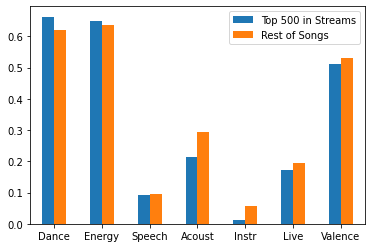

In [29]:
Top500StreamedX = [Top500Streamed["Danceability"].mean(), Top500Streamed["Energy"].mean(), Top500Streamed["Speechiness"].mean(), Top500Streamed["Acousticness"].mean(), Top500Streamed["Instrumentalness"].mean(), Top500Streamed["Liveness"].mean(), Top500Streamed["Valence"].mean()]
MinusTop500StreamedX = [MinusTop500Streamed["Danceability"].mean(), MinusTop500Streamed["Energy"].mean(), MinusTop500Streamed["Speechiness"].mean(), MinusTop500Streamed["Acousticness"].mean(), MinusTop500Streamed["Instrumentalness"].mean(), MinusTop500Streamed["Liveness"].mean(), MinusTop500Streamed["Valence"].mean()]
index = ['Dance', 'Energy', 'Speech',
         'Acoust', 'Instr', 'Live', 'Valence']
Diff500 = pd.DataFrame({"Top 500 in Streams": Top500StreamedX,
                   'Rest of Songs': MinusTop500StreamedX}, index=index)
Diff500Graph = Diff500.plot.bar(rot=0)
print("Top 500 Streamed Songs vs. The Rest")
Diff500Graph

# This cell creates a DataFrame will the differences in the mean values between the 500 & N-500 data. 
# We then take these two DataFrames & graph them in a barplot, to better visualize the difference in mean values 
# in the desired criteria. 

In [30]:
# The plot above helps us visualize the difference between the Top 500 songs & the rest. 

# The key differences observed are that the Top 500 streaming songs on Spotify have significantly
# lower mean values of their Acoustiness & Instrumentalness metric compared to other songs. 

# The Top 500 songs also have lower values for mean Speechiness, Liveness, & Valence, but not very significantly. 

# On the other hand, the Top 500 songs have higher mean Danceability & Energy values. 

In [31]:
# This cell just further quantifies the difference in the mean values between the two groups. 

gen_minus_500_mean_Dance = (Top500Streamed["Danceability"].mean() - MinusTop500Streamed["Danceability"].mean())
gen_minus_500_mean_Energy = (Top500Streamed["Energy"].mean() - MinusTop500Streamed["Energy"].mean())
gen_minus_500_mean_Loudness = (Top500Streamed["Loudness"].mean() - MinusTop500Streamed["Loudness"].mean())
gen_minus_500_mean_Speech = -(Top500Streamed["Speechiness"].mean() - MinusTop500Streamed["Speechiness"].mean())
gen_minus_500_mean_Acou = -(Top500Streamed["Acousticness"].mean() - MinusTop500Streamed["Acousticness"].mean())
gen_minus_500_mean_Inst = -(Top500Streamed["Instrumentalness"].mean() - MinusTop500Streamed["Instrumentalness"].mean())
gen_minus_500_mean_Live = -(Top500Streamed["Liveness"].mean() - MinusTop500Streamed["Liveness"].mean())
gen_minus_500_mean_Val = -(Top500Streamed["Valence"].mean() - MinusTop500Streamed["Valence"].mean())
gen_minus_500_mean_Tempo = -(Top500Streamed["Tempo"].mean() - MinusTop500Streamed["Tempo"].mean())


print("When comparing the mean values between the Top 500 most streamed songs on Spotify as compared to the cleaned up dataset:\n")
print("The top 500 songs have {:.2} more Danceability than the rest of the songs".format(gen_minus_500_mean_Dance))
print("The top 500 songs have {:.2} more Energy than the rest of the songs".format(gen_minus_500_mean_Energy))
print("The top 500 songs have {:.2} more dB (Loudness) than the rest of the songs\n".format(gen_minus_500_mean_Loudness))
print("The top 500 songs have {:.2} less Speechiness than the rest of the songs".format(gen_minus_500_mean_Speech))
print("The top 500 songs have {:.2} less Acousticness than the rest of the songs".format(gen_minus_500_mean_Acou))
print("The top 500 songs have {:.2} less Instrumentalness than the rest of the songs".format(gen_minus_500_mean_Inst))
print("The top 500 songs have {:.2} less Liveness than the rest of the songs".format(gen_minus_500_mean_Live))
print("The top 500 songs have {:.2} less Valence than the rest of the songs".format(gen_minus_500_mean_Val))
print("The top 500 songs have {:.2} less bpm (Tempo) than the rest of the songs".format(gen_minus_500_mean_Tempo))

When comparing the mean values between the Top 500 most streamed songs on Spotify as compared to the cleaned up dataset:

The top 500 songs have 0.044 more Danceability than the rest of the songs
The top 500 songs have 0.015 more Energy than the rest of the songs
The top 500 songs have 1.6 more dB (Loudness) than the rest of the songs

The top 500 songs have 0.0025 less Speechiness than the rest of the songs
The top 500 songs have 0.079 less Acousticness than the rest of the songs
The top 500 songs have 0.045 less Instrumentalness than the rest of the songs
The top 500 songs have 0.022 less Liveness than the rest of the songs
The top 500 songs have 0.017 less Valence than the rest of the songs
The top 500 songs have 1.5 less bpm (Tempo) than the rest of the songs


In [32]:
# We will now do the same analysis with the Top 100 Songs & the N-100 songs. 

In [33]:
general_minus_top100 = Top100Streamed_SummaryStats.subtract(MinusTop100Streamed_SummaryStats, fill_value=None)

general_minus_top100

# This DataFrame is the Top 100 songs statistics - the remainings (N-100) songs. 
# We will visualize this data in the next cell as well. 

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,-19877.000000,-19877.000000,-19877.000000,-19877.000000,-19877.000000,-19877.000000,-19877.000000,-19877.000000,-19877.000000
mean,0.037595,0.002003,1.829294,-0.007637,-0.065109,-0.052351,-0.029868,-0.006158,0.035129
std,-0.031703,-0.046661,-2.652023,-0.023035,-0.031949,-0.174745,-0.041197,-0.010226,-0.299502
min,0.351000,0.263980,35.286000,0.023200,0.000281,0.000000,0.019900,0.100000,74.897000
25%,0.053000,0.015750,1.984250,0.004175,-0.017750,0.000000,-0.000600,0.014000,0.983000
50%,0.046000,-0.014500,0.908000,0.006200,-0.071000,-0.000002,-0.015500,-0.044000,-4.292500
75%,0.014000,-0.029000,0.553000,-0.007375,-0.111500,-0.000383,-0.068500,-0.016000,4.218750
max,-0.054000,-0.073000,-3.669000,-0.523000,-0.062000,-0.866000,-0.210000,-0.062000,-57.369000


Top 100 Streamed Songs vs. The Rest


<AxesSubplot:>

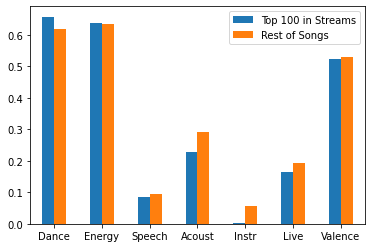

In [34]:
Top100StreamedX = [Top100Streamed["Danceability"].mean(), Top100Streamed["Energy"].mean(), Top100Streamed["Speechiness"].mean(), Top100Streamed["Acousticness"].mean(), Top100Streamed["Instrumentalness"].mean(), Top100Streamed["Liveness"].mean(), Top100Streamed["Valence"].mean()]
MinusTop100StreamedX = [MinusTop100Streamed["Danceability"].mean(), MinusTop100Streamed["Energy"].mean(), MinusTop100Streamed["Speechiness"].mean(), MinusTop100Streamed["Acousticness"].mean(), MinusTop100Streamed["Instrumentalness"].mean(), MinusTop100Streamed["Liveness"].mean(), MinusTop100Streamed["Valence"].mean()]
index = ['Dance', 'Energy', 'Speech',
         'Acoust', 'Instr', 'Live', 'Valence']
Diff100 = pd.DataFrame({"Top 100 in Streams": Top100StreamedX,
                   'Rest of Songs': MinusTop100StreamedX}, index=index)
Diff100Graph = Diff100.plot.bar(rot=0)
print("Top 100 Streamed Songs vs. The Rest")
Diff100Graph

# This cell creates a DataFrame will the differences in the mean values between the 100 & N-100 data. 
# We then take these two DataFrames & graph them in a barplot, to better visualize the difference in mean values 
# in the desired criteria. 

In [35]:
# This cell just further quantifies the difference in the mean values between the two groups. 

gen_minus_100_mean_Dance = (Top100Streamed["Danceability"].mean() - MinusTop100Streamed["Danceability"].mean())
gen_minus_100_mean_Energy = (Top100Streamed["Energy"].mean() - MinusTop100Streamed["Energy"].mean())
gen_minus_100_mean_Loudness = (Top100Streamed["Loudness"].mean() - MinusTop100Streamed["Loudness"].mean())
gen_minus_100_mean_Speech = -(Top100Streamed["Speechiness"].mean() - MinusTop100Streamed["Speechiness"].mean())
gen_minus_100_mean_Acou = -(Top100Streamed["Acousticness"].mean() - MinusTop100Streamed["Acousticness"].mean())
gen_minus_100_mean_Inst = -(Top100Streamed["Instrumentalness"].mean() - MinusTop100Streamed["Instrumentalness"].mean())
gen_minus_100_mean_Live = -(Top100Streamed["Liveness"].mean() - MinusTop100Streamed["Liveness"].mean())
gen_minus_100_mean_Val = -(Top100Streamed["Valence"].mean() - MinusTop100Streamed["Valence"].mean())
gen_minus_100_mean_Tempo = (Top100Streamed["Tempo"].mean() - MinusTop100Streamed["Tempo"].mean())


print("When comparing the mean values between the Top 500 most streamed songs on Spotify as compared to the cleaned up dataset:\n")
print("The top 100 songs have {:.2} more Danceability than the rest of the songs".format(gen_minus_100_mean_Dance))
print("The top 100 songs have {:.2} more Energy than the rest of the songs".format(gen_minus_100_mean_Energy))
print("The top 100 songs have {:.2} more dB (Loudness) than the rest of the songs".format(gen_minus_100_mean_Loudness))
print("The top 100 songs have {:.2} more bpm (Tempo) than the rest of the songs\n".format(gen_minus_100_mean_Tempo))
print("The top 100 songs have {:.2} less Speechiness than the rest of the songs".format(gen_minus_100_mean_Speech))
print("The top 100 songs have {:.2} less Acousticness than the rest of the songs".format(gen_minus_100_mean_Acou))
print("The top 100 songs have {:.2} less Instrumentalness than the rest of the songs".format(gen_minus_100_mean_Inst))
print("The top 100 songs have {:.2} less Liveness than the rest of the songs".format(gen_minus_100_mean_Live))
print("The top 100 songs have {:.2} less Valence than the rest of the songs".format(gen_minus_100_mean_Val))


When comparing the mean values between the Top 500 most streamed songs on Spotify as compared to the cleaned up dataset:

The top 100 songs have 0.038 more Danceability than the rest of the songs
The top 100 songs have 0.002 more Energy than the rest of the songs
The top 100 songs have 1.8 more dB (Loudness) than the rest of the songs
The top 100 songs have 0.035 more bpm (Tempo) than the rest of the songs

The top 100 songs have 0.0076 less Speechiness than the rest of the songs
The top 100 songs have 0.065 less Acousticness than the rest of the songs
The top 100 songs have 0.052 less Instrumentalness than the rest of the songs
The top 100 songs have 0.03 less Liveness than the rest of the songs
The top 100 songs have 0.0062 less Valence than the rest of the songs


In [36]:
# We observe very similar trends between the Top 500 / N-500 analysis & the Top 100 / N-100 analysis. 

In [37]:
### Now for the Valence test

In [38]:
# Task 3: We will now observe the characteristics between the tracks that are in the Top 100 of Valence with 
#         the Bottom 100 of Valence. Since Valence is the measure describing musical positiveness, with
#         low valence sound more negative (e.g. sad, depressed, angry) & high valence sound more 
#         positive (e.g. happy, cheerful, euphoric), we can expect to be able to see dratically
#         difference characteristics between the two groupings of songs. With this information, we could
#         potentially look at the characteristics of other songs & generate a classification model to assign
#         a valence based on the other attributes of the song. 

In [39]:
ValenceTop100 = data.copy(deep=True)
ValenceTop100 = ValenceTop100.nlargest(n=100, columns = "Valence")
ValenceTop100.describe()

# This generates a DataFrame with the Top 100 songs by its Valence. 
# Below is a description of the DataFrame's characteristics.

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,7872.810000,0.739300,0.709870,5.07000,-7.008250,0.055868,0.315728,0.046812,0.167121,0.974700,129.800330,185912.880000,9.498953e+07
std,5773.093834,0.100782,0.155482,3.47358,3.049029,0.043517,0.255510,0.167175,0.129982,0.005327,23.840543,54208.761624,1.451254e+08
min,214.000000,0.415000,0.283000,0.00000,-15.547000,0.027300,0.003400,0.000000,0.018100,0.969000,82.930000,48978.000000,2.150900e+05
25%,3389.250000,0.685750,0.597250,2.00000,-8.883500,0.033050,0.093275,0.000000,0.070700,0.971000,119.523250,149283.500000,1.737862e+07
50%,6922.500000,0.751000,0.721500,5.00000,-6.085500,0.043250,0.248000,0.000027,0.111500,0.973000,126.150500,178066.500000,4.903818e+07
75%,11326.500000,0.808250,0.827000,8.00000,-4.746250,0.057175,0.514500,0.004515,0.270500,0.977000,140.087500,217798.250000,1.143086e+08
max,20537.000000,0.931000,0.981000,11.00000,-1.589000,0.288000,0.824000,0.969000,0.605000,0.993000,204.090000,328196.000000,1.197922e+09


In [40]:
ValenceBottom100 = data.copy(deep=True)
ValenceBottom100 = ValenceBottom100.nsmallest(n=100, columns = "Valence")
ValenceBottom100.describe()

# This generates a DataFrame with the Bottom 100 songs by its Valence. 
# Below is a description of the DataFrame's characteristics.

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,11782.300000,0.192838,0.484979,4.470000,-20.85946,0.056227,0.585145,0.698708,0.318673,0.015073,83.753470,2.265337e+05,5.624685e+07
std,5753.007234,0.166092,0.420992,3.523242,6.92529,0.059003,0.387647,0.364816,0.288520,0.015712,48.418792,4.282312e+05,1.452299e+08
min,593.000000,0.000000,0.000020,0.000000,-34.37900,0.000000,0.000001,0.000000,0.072900,0.000000,0.000000,3.100000e+04,4.657660e+05
25%,8286.750000,0.076425,0.046475,1.000000,-25.19325,0.037100,0.135000,0.508750,0.108000,0.000000,70.854500,7.222300e+04,7.552536e+06
50%,9364.500000,0.163000,0.384000,3.500000,-22.56400,0.044650,0.781500,0.877000,0.175000,0.009870,82.375000,1.451250e+05,1.697296e+07
75%,15592.250000,0.254750,0.989000,8.000000,-16.45700,0.065475,0.932250,0.969000,0.458750,0.033100,120.004000,2.335715e+05,3.307344e+07
max,20654.000000,0.623000,1.000000,10.000000,-4.22500,0.445000,0.994000,1.000000,0.967000,0.035200,199.978000,4.120258e+06,9.564357e+08


In [41]:
ValenceTop100_Danceability = ValenceTop100['Danceability'].describe()
ValenceTop100_Energy = ValenceTop100['Energy'].describe()
ValenceTop100_Loudness = ValenceTop100['Loudness'].describe()
ValenceTop100_Speechiness = ValenceTop100['Speechiness'].describe()
ValenceTop100_Acousticness = ValenceTop100['Acousticness'].describe()
ValenceTop100_Instrumentalness = ValenceTop100['Instrumentalness'].describe()
ValenceTop100_Liveness = ValenceTop100['Liveness'].describe()
ValenceTop100_Valence = ValenceTop100['Valence'].describe()
ValenceTop100_Tempo = ValenceTop100['Tempo'].describe()
ValenceTop100_Stream = ValenceTop100['Stream'].describe()

ValenceTop100_SummaryStats = pd.concat([ValenceTop100_Danceability, ValenceTop100_Energy, ValenceTop100_Loudness, ValenceTop100_Speechiness, ValenceTop100_Acousticness, ValenceTop100_Instrumentalness, ValenceTop100_Liveness, ValenceTop100_Valence, ValenceTop100_Tempo, ValenceTop100_Stream],axis=1)
ValenceTop100_SummaryStats

# This cell shows the Summary statistics for the desired attriubtes of the Top 100 songs based on Valence. 

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Stream
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,0.739300,0.709870,-7.008250,0.055868,0.315728,0.046812,0.167121,0.974700,129.800330,9.498953e+07
std,0.100782,0.155482,3.049029,0.043517,0.255510,0.167175,0.129982,0.005327,23.840543,1.451254e+08
min,0.415000,0.283000,-15.547000,0.027300,0.003400,0.000000,0.018100,0.969000,82.930000,2.150900e+05
25%,0.685750,0.597250,-8.883500,0.033050,0.093275,0.000000,0.070700,0.971000,119.523250,1.737862e+07
50%,0.751000,0.721500,-6.085500,0.043250,0.248000,0.000027,0.111500,0.973000,126.150500,4.903818e+07
75%,0.808250,0.827000,-4.746250,0.057175,0.514500,0.004515,0.270500,0.977000,140.087500,1.143086e+08
max,0.931000,0.981000,-1.589000,0.288000,0.824000,0.969000,0.605000,0.993000,204.090000,1.197922e+09


In [42]:
ValenceBottom100_Danceability = ValenceBottom100['Danceability'].describe()
ValenceBottom100_Energy = ValenceBottom100['Energy'].describe()
ValenceBottom100_Loudness = ValenceBottom100['Loudness'].describe()
ValenceBottom100_Speechiness = ValenceBottom100['Speechiness'].describe()
ValenceBottom100_Acousticness = ValenceBottom100['Acousticness'].describe()
ValenceBottom100_Instrumentalness = ValenceBottom100['Instrumentalness'].describe()
ValenceBottom100_Liveness = ValenceBottom100['Liveness'].describe()
ValenceBottom100_Valence = ValenceBottom100['Valence'].describe()
ValenceBottom100_Tempo = ValenceBottom100['Tempo'].describe()
ValenceBottom100_Stream = ValenceBottom100['Stream'].describe()

ValenceBottom100_SummaryStats = pd.concat([ValenceBottom100_Danceability, ValenceBottom100_Energy, ValenceBottom100_Loudness, ValenceBottom100_Speechiness, ValenceBottom100_Acousticness, ValenceBottom100_Instrumentalness, ValenceBottom100_Liveness, ValenceBottom100_Valence, ValenceBottom100_Tempo, ValenceBottom100_Stream],axis=1)
ValenceBottom100_SummaryStats

# Similarly, this cell shows the Summary statistics for the desired attriubtes of the Bottom 100 songs based on Valence. 

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Stream
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,0.192838,0.484979,-20.85946,0.056227,0.585145,0.698708,0.318673,0.015073,83.753470,5.624685e+07
std,0.166092,0.420992,6.92529,0.059003,0.387647,0.364816,0.288520,0.015712,48.418792,1.452299e+08
min,0.000000,0.000020,-34.37900,0.000000,0.000001,0.000000,0.072900,0.000000,0.000000,4.657660e+05
25%,0.076425,0.046475,-25.19325,0.037100,0.135000,0.508750,0.108000,0.000000,70.854500,7.552536e+06
50%,0.163000,0.384000,-22.56400,0.044650,0.781500,0.877000,0.175000,0.009870,82.375000,1.697296e+07
75%,0.254750,0.989000,-16.45700,0.065475,0.932250,0.969000,0.458750,0.033100,120.004000,3.307344e+07
max,0.623000,1.000000,-4.22500,0.445000,0.994000,1.000000,0.967000,0.035200,199.978000,9.564357e+08


Top 100 Valence vs. Bottom 100 Valence


<AxesSubplot:>

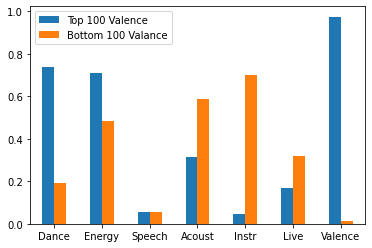

In [43]:
Top100Valence = [ValenceTop100["Danceability"].mean(), ValenceTop100["Energy"].mean(), ValenceTop100["Speechiness"].mean(), ValenceTop100["Acousticness"].mean(), ValenceTop100["Instrumentalness"].mean(), ValenceTop100["Liveness"].mean(), ValenceTop100["Valence"].mean()]
Bottom100Valence = [ValenceBottom100["Danceability"].mean(), ValenceBottom100["Energy"].mean(), ValenceBottom100["Speechiness"].mean(), ValenceBottom100["Acousticness"].mean(), ValenceBottom100["Instrumentalness"].mean(), ValenceBottom100["Liveness"].mean(), ValenceBottom100["Valence"].mean()]
index = ['Dance', 'Energy', 'Speech',
         'Acoust', 'Instr', 'Live', 'Valence']
ValGraphDF = pd.DataFrame({"Top 100 Valence": Top100Valence,
                   'Bottom 100 Valance': Bottom100Valence}, index=index)
ValGraph = ValGraphDF.plot.bar(rot=0)
print("Top 100 Valence vs. Bottom 100 Valence")
ValGraph

# This cell creates a DataFrame will the differences in the mean values between the Top Valence & Bottom Valence data. 
# We then take these two DataFrames & graph them in a barplot, to better visualize the difference in mean values 
# in the desired criteria. 

In [44]:
# We see that when comparing our Top 100 songs in Valence vs. our Bottom 100 songs in Valence, there are
# drastically higher average values of Danceability & Energy in the songs that are highest in Valence. 

# We see no major change in the amount of Speechiness between the two groups. 

# We also see a that songs that are in the Top 100 songs in Valence have significantly lower values of 
# Acousticness, Instrumentalness, & Liveness. 

# We can conclude that there are significant differences between these two groups of songs, & we could potentially
# create a classification model that allows us to predict a songs valence based on its other characteristics.

Top 100 Valence vs. Bottom 100 Valence: Streams


<AxesSubplot:>

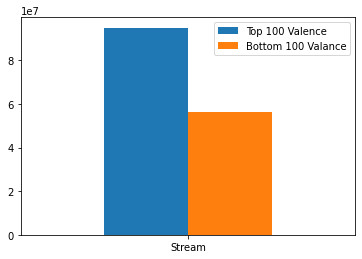

In [45]:
Top100ValenceStreams = [ValenceTop100["Stream"].mean()]
Bottom100ValenceStreams = [ValenceBottom100["Stream"].mean()]
index = ['Stream']
ValGraphStreamsDF = pd.DataFrame({"Top 100 Valence": Top100ValenceStreams,
                   'Bottom 100 Valance': Bottom100ValenceStreams}, index=index)
ValGraphStreams = ValGraphStreamsDF.plot.bar(rot=0)
print("Top 100 Valence vs. Bottom 100 Valence: Streams")
ValGraphStreams

In [46]:
# We can see a very big difference in the average value of streams the songs with the Top 100 Valance have
# compared to the Bottom 100 Valence. The Top 100 songs in Valence have a massive difference in terms of
# the streams on Spotify, leading us to the conclucion that songs with extremely high Valence perform 
# significantly better than songs with extremely low Valence. 

In [47]:
# This cell just further quantifies the difference in the mean values between the two groups:
# Top 100 in Valence vs. Bottom 100 in Valence

TopVal_Minus_BottomVal_Dance = (ValenceTop100["Danceability"].mean() - ValenceBottom100["Danceability"].mean())
TopVal_Minus_BottomVal_Energy = (ValenceTop100["Energy"].mean() - ValenceBottom100["Energy"].mean())
TopVal_Minus_BottomVal_Loudness = (ValenceTop100["Loudness"].mean() - ValenceBottom100["Loudness"].mean())
TopVal_Minus_BottomVal_Speech = -(ValenceTop100["Speechiness"].mean() - ValenceBottom100["Speechiness"].mean())
TopVal_Minus_BottomVal_Acou = -(ValenceTop100["Acousticness"].mean() - ValenceBottom100["Acousticness"].mean())
TopVal_Minus_BottomVal_Inst = -(ValenceTop100["Instrumentalness"].mean() - ValenceBottom100["Instrumentalness"].mean())
TopVal_Minus_BottomVal_Live = -(ValenceTop100["Liveness"].mean() - ValenceBottom100["Liveness"].mean())
TopVal_Minus_BottomVal_Val = (ValenceTop100["Valence"].mean() - ValenceBottom100["Valence"].mean())
TopVal_Minus_BottomVal_Tempo = (ValenceTop100["Tempo"].mean() - ValenceBottom100["Tempo"].mean())
TopVal_Minus_BottomVal_Stream = (ValenceTop100["Stream"].mean() - ValenceBottom100["Stream"].mean())

print("When comparing the mean values between the Top 100 songs in Valence on Spotify as compared to the Bottom 100 songs in Valence:\n")
print("The top 100 songs have {:.2} more Danceability than the bottom 100".format(TopVal_Minus_BottomVal_Dance))
print("The top 100 songs have {:.2} more Energy than the bottom 100".format(TopVal_Minus_BottomVal_Energy))
print("The top 100 songs have {:.2f} more dB (Loudness) than the bottom 100".format(TopVal_Minus_BottomVal_Loudness))
print("The top 100 songs have {:.2f} more bpm (Tempo) than the bottom 100\n".format(TopVal_Minus_BottomVal_Tempo))
print("The top 100 songs have {:.2} less Speechiness than the bottom 100".format(TopVal_Minus_BottomVal_Speech))
print("The top 100 songs have {:.2} less Acousticness than the bottom 100".format(TopVal_Minus_BottomVal_Acou))
print("The top 100 songs have {:.2} less Instrumentalness than the bottom 100".format(TopVal_Minus_BottomVal_Inst))
print("The top 100 songs have {:.2} less Liveness than the bottom 100\n".format(TopVal_Minus_BottomVal_Live))
print("The top 100 songs have {:.2} more Valence than the bottom 100".format(TopVal_Minus_BottomVal_Val))

print("The top 100 songs have {:} more Streams than the bottom 100".format(TopVal_Minus_BottomVal_Stream))



When comparing the mean values between the Top 100 songs in Valence on Spotify as compared to the Bottom 100 songs in Valence:

The top 100 songs have 0.55 more Danceability than the bottom 100
The top 100 songs have 0.22 more Energy than the bottom 100
The top 100 songs have 13.85 more dB (Loudness) than the bottom 100
The top 100 songs have 46.05 more bpm (Tempo) than the bottom 100

The top 100 songs have 0.00036 less Speechiness than the bottom 100
The top 100 songs have 0.27 less Acousticness than the bottom 100
The top 100 songs have 0.65 less Instrumentalness than the bottom 100
The top 100 songs have 0.15 less Liveness than the bottom 100

The top 100 songs have 0.96 more Valence than the bottom 100
The top 100 songs have 38742688.43 more Streams than the bottom 100


In [48]:
# We see that when comparing our Top 100 songs in Valence vs. our Bottom 100 songs in Valence, there are
# drastically higher average values of Danceability & Energy in the songs that are highest in Valence. 

# We see no major change in the amount of Speechiness between the two groups. 

# We also see a that songs that are in the Top 100 songs in Valence have significantly lower values of 
# Acousticness, Instrumentalness, & Liveness. 

# Most importantly, we can see that songs with extremely high Valence have significantly higher streams on average 
# when compared to the songs with extremely low Valence. 

# We can conclude that there are significant differences between these two groups of songs, & we could potentially
# create a classification model that allows us to predict a songs valence based on its other characteristics. 

In [ ]:
# Thank you for checking out my project! 